In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# patching
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))


from utils.utils import find_nearest

In [10]:
df_020 = pd.read_csv("../../data/ad8400/ad8400_020.csv")

In [11]:
df_020

,code,resistance
0,0,45
1,1,51
2,2,54
3,3,61
4,4,64
...,...,...
251,251,1018
252,252,1021
253,253,1026
254,254,1029


In [12]:
df_045 = pd.read_csv("../../data/ad8400/ad8400_045.csv")

In [13]:
df_045

,code,resistance
0,0,47
1,1,53
2,2,59
3,3,62
4,4,67
...,...,...
251,251,1146
252,252,1151
253,253,1155
254,254,1160


In [14]:
possible_values = {}
for _, r1 in df_045.iterrows():
    for _, r2 in df_020.iterrows():
            possible_value = round((r1["resistance"] * r2["resistance"]) / (r1["resistance"] + r2["resistance"]), 5)
            possible_values[possible_value] = [int(r1["code"]), int(r2["code"])]

In [15]:
possible_values

{22.98913: [0, 0],
 24.45918: [0, 1],
 25.12871: [0, 2],
 26.5463: [0, 3],
 27.0991: [0, 4],
 27.9569: [0, 5],
 28.59167: [0, 6],
 29.328: [0, 7],
 29.6063: [0, 8],
 30.39098: [0, 9],
 30.63704: [0, 10],
 31.22143: [0, 11],
 31.55245: [0, 12],
 32.07432: [0, 13],
 32.37086: [0, 14],
 32.74839: [0, 15],
 32.83974: [0, 16],
 33.44785: [0, 17],
 33.69277: [0, 18],
 34.15698: [0, 19],
 34.3046: [0, 20],
 34.65922: [0, 21],
 34.86264: [0, 22],
 35.18717: [0, 23],
 35.37368: [0, 24],
 35.67179: [0, 25],
 35.7868: [0, 26],
 36.06436: [0, 27],
 36.22439: [0, 28],
 36.48095: [0, 29],
 36.62911: [0, 30],
 36.82028: [0, 32],
 37.09417: [0, 33],
 37.22566: [0, 34],
 37.43723: [0, 35],
 37.55983: [0, 36],
 37.75732: [0, 37],
 37.8719: [0, 38],
 38.05668: [0, 39],
 38.12851: [0, 40],
 38.30315: [0, 41],
 38.40467: [0, 42],
 38.5687: [0, 43],
 38.66415: [0, 44],
 38.81852: [0, 45],
 38.90842: [0, 46],
 39.02527: [0, 47],
 39.08244: [0, 48],
 39.27622: [0, 49],
 39.3564: [0, 50],
 39.48639: [0, 51],
 

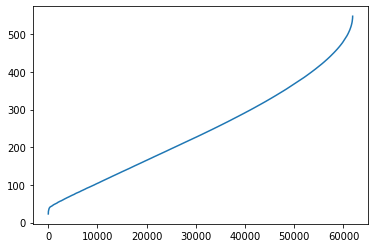

In [16]:
plt.plot(sorted(possible_values.keys()))

In [17]:
from typing import Iterable
from numbers import Number

def create_dataframe(
        path_to_pt,
        possible_values: dict,
        resistance_range: Iterable[Number],
        digipot1_data: pd.DataFrame,
        digipot2_data: pd.DataFrame,
) -> pd.DataFrame:
    df = pd.read_csv(path_to_pt)
    df["calc"] = df["R"].apply(lambda x: find_nearest(resistance_range, x))
    df["error"] = abs(df["R"] - df["calc"])
    df["code"] = df["calc"].apply(lambda x: possible_values[x])
    df["R1_code"] = df["code"].apply(lambda x: x[0])
    df["R2_code"] = df["code"].apply(lambda x: x[1])
    df["R1"] = df["R1_code"].apply(lambda x: digipot1_data[digipot1_data["code"] == x].iloc[0]["resistance"])
    df["R2"] = df["R2_code"].apply(lambda x: digipot2_data[digipot2_data["code"] == x].iloc[0]["resistance"])
    del df["code"]
    return df

In [20]:
df_tsm_50m = create_dataframe(
    "../../data/sensors_characteristics/50М.csv",
    possible_values, 
    [v for v in possible_values if 35 < v < 75],
    df_045,
    df_020,
)

In [21]:
df_tsm_50m

,T,R,calc,error,R1_code,R2_code,R1,R2
0,-50,39.30,39.29577,0.00423,60,0,310,45
1,-49,39.51,39.51220,0.00220,63,0,324,45
2,-48,39.73,39.73355,0.00355,0,54,47,257
3,-47,39.94,39.91987,0.02013,0,56,47,265
4,-46,40.16,40.17352,0.01352,1,30,53,166
...,...,...,...,...,...,...,...,...
146,96,70.54,70.54054,0.00054,30,17,180,116
147,97,70.76,70.75862,0.00138,6,253,76,1026
148,98,70.97,70.96789,0.00211,7,135,81,573
149,99,71.19,71.19283,0.00283,7,139,81,588


In [22]:
df_tsm_50m["error"].max()

0.020129999999994652

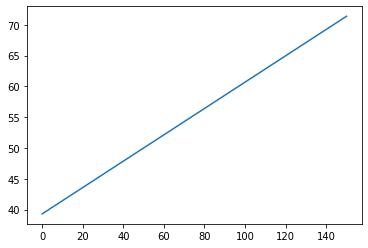

In [23]:
plt.plot(df_tsm_50m["calc"])

In [64]:
df_tsm_50m.to_csv("data/real_sensors/50М.csv", index=False)